# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-15

Tentang dataset: Dataset ini berisi harga penjualan mobil bekas.

Objective: Membuat model linear regression prediksi harga mobil 



---

# ii. Import Libraries

In [1]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# libraries model mechine learning
from sklearn.linear_model import LinearRegression

# libraries Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer # outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler # scalling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # encoder

# Libraries model evaluation
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

# Display QQ plot
import statsmodels.api as sm

# Libraries model saving
import pickle
import json


# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')



---

# iii. Data Loading

In [2]:
df = pd.read_csv('car-price-prediction.csv')
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,26695,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,5999,Manual,68000,Diesel,145,56.5,2.1
2,Vauxhall,Meriva,2016,6790,Manual,27772,Petrol,145,47.1,1.4
3,VW,Shuttle,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
4,Vauxhall,Corsa,2017,7999,Manual,22322,Petrol,30,54.3,1.4
...,...,...,...,...,...,...,...,...,...,...
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,17490,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,3998,Manual,58350,Petrol,125,51.4,1.2


In [3]:
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  24000
Jumlah Kolom:  10


In [4]:
# Data 5 teratas 
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,26695,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,5999,Manual,68000,Diesel,145,56.5,2.1
2,Vauxhall,Meriva,2016,6790,Manual,27772,Petrol,145,47.1,1.4
3,VW,Shuttle,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
4,Vauxhall,Corsa,2017,7999,Manual,22322,Petrol,30,54.3,1.4


In [5]:
# Data 5 Terbawah
df.tail()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,17490,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,3998,Manual,58350,Petrol,125,51.4,1.2
23999,Audi,Q5,2019,31995,Semi-Auto,12413,Diesel,150,38.2,2.0


In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         24000 non-null  object 
 1   model         24000 non-null  object 
 2   year          24000 non-null  int64  
 3   price         24000 non-null  int64  
 4   transmission  24000 non-null  object 
 5   mileage       24000 non-null  int64  
 6   fuelType      24000 non-null  object 
 7   tax           24000 non-null  int64  
 8   mpg           24000 non-null  float64
 9   engineSize    24000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.8+ MB


Note:
- Memiliki jumlah baris 24000 dan kolom 10
- type data float = 2, int = 4, dan object = 4

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,2017.172000,17154.666208,22677.318208,122.455625,54.513126,1.676517
std,2.072139,9904.741481,20898.280371,60.220629,16.420648,0.552661
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10390.000000,6981.250000,125.000000,45.600000,1.400000
50%,2017.000000,14995.000000,17155.000000,145.000000,54.300000,1.600000
75%,2019.000000,21286.250000,32093.500000,145.000000,61.400000,2.000000
max,2060.000000,140319.000000,300000.000000,580.000000,470.800000,6.200000


rata - rata year 2017 dengan  harga 17.154

---

# iv. Exploratory Data Analysis (EDA)

In [85]:
# copy dataset
data = df.copy()

In [86]:
# Fungsi untuk mengkategorikan usia
def efisiensi(mpg):
    if mpg >= 60 :
        return 'super efficient'
    elif 50 <= mpg < 60  :
        return 'efficient '
    elif 35 <= mpg < 50:
        return 'decent '
    elif  25 <= mpg < 35:
        return 'standard '
    else:
        return 'not efficient'

# Membuat kolom baru dengan hasil filter
data['efisiensi'] = data['mpg'].apply(efisiensi)


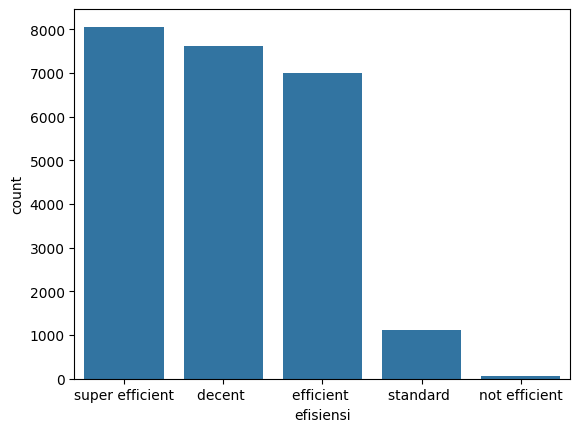

In [90]:
sns.countplot(x = 'efisiensi',
              data = data,
              order = data['efisiensi'].value_counts().index)
plt.show()


Dari plot menujukan super eficient yang pertama

---

# v. Feature Engineering

In [10]:
# cek duplicated data
df.duplicated().sum()

143

143 data duplikat yang harus drop

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# cek duplicated data
df.duplicated().sum()

0

## Spliting Data

In [13]:
# dump dataset agar tidak mengulang
data_copy = df.copy()

In [14]:
# split data feature dan target
X = df.drop('price', axis=1)
y = df['price']

In [15]:
# Split data Train dan Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
# Create functiion sizes chek
def print_data_sizes(X_train, y_train, X_test, y_test):
    print('Train Data')
    print('Ukuran X_train : ', X_train.shape)
    print('Ukuran y_train : ', y_train.shape)
    print('\n')
    print('Test Data')
    print('Ukuran X_test : ', X_test.shape)
    print('Ukuran y_test : ', y_test.shape)


print_data_sizes(X_train, y_train, X_test, y_test)

Train Data
Ukuran X_train :  (19085, 9)
Ukuran y_train :  (19085,)


Test Data
Ukuran X_test :  (4772, 9)
Ukuran y_test :  (4772,)


In [17]:
X_train

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
9431,Skoda,Superb,2019,Semi-Auto,13,Petrol,145,38.2,2.0
17575,Vauxhall,Meriva,2016,Manual,50254,Petrol,145,47.1,0.0
21932,Hyundai,I30,2016,Manual,53878,Diesel,20,72.4,1.6
5730,Ford,Kuga,2019,Manual,151,Diesel,145,38.2,2.0
9608,Ford,Fiesta,2014,Manual,23777,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
21696,BMW,X1,2017,Manual,25818,Diesel,125,60.1,2.0
5408,Audi,A5,2013,Semi-Auto,75900,Diesel,125,58.9,2.0
861,Vauxhall,Insignia,2018,Manual,37211,Diesel,145,53.3,2.0
15874,VW,Golf,2019,Manual,8758,Petrol,145,49.6,1.0


In [18]:
X_test

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
2869,Mercedez,E Class,2017,Semi-Auto,33133,Diesel,20,72.4,2.0
23723,Skoda,Octavia,2018,Semi-Auto,19212,Diesel,145,55.4,2.0
15801,Vauxhall,Crossland X,2019,Manual,5453,Diesel,145,60.1,1.5
22249,Hyundai,I10,2019,Manual,443,Petrol,145,49.6,1.0
21941,Skoda,Citigo,2016,Manual,10222,Petrol,20,64.2,1.0
...,...,...,...,...,...,...,...,...,...
17284,VW,Touran,2016,Manual,8700,Petrol,145,49.6,1.4
3990,Ford,Fiesta,2018,Automatic,30232,Petrol,145,48.7,1.0
22801,Ford,Fiesta,2018,Manual,4868,Petrol,145,64.2,1.1
16029,Skoda,Fabia,2015,Manual,14829,Petrol,20,58.8,1.0


## Checking cardinality

In [19]:
df.nunique()

brand               8
model             163
year               23
price            5901
transmission        4
mileage         16425
fuelType            5
tax                37
mpg               152
engineSize         33
dtype: int64

In [20]:
df.describe(include='object')

,brand,model,transmission,fuelType
count,23857,23857,23857,23857
unique,8,163,4,5
top,Ford,Fiesta,Manual,Petrol
freq,2995,1129,13252,13037


In [21]:
# split data list kategorikal dan numerik agar mudah di analisis
cat = X_train.select_dtypes(include=['object']).columns.to_list()
num = X_train.select_dtypes(include=np.number).columns.to_list()

In [22]:
df[cat].head()

,brand,model,transmission,fuelType
0,Audi,A4,Semi-Auto,Diesel
1,Mercedez,C Class,Manual,Diesel
2,Vauxhall,Meriva,Manual,Petrol
3,VW,Shuttle,Semi-Auto,Diesel
4,Vauxhall,Corsa,Manual,Petrol


In [23]:
df[num].head()

,year,mileage,tax,mpg,engineSize
0,2019,5000,145,51.4,2.0
1,2010,68000,145,56.5,2.1
2,2016,27772,145,47.1,1.4
3,2019,10074,145,32.8,2.0
4,2017,22322,30,54.3,1.4


Dari check data Cardinality tidak ada pola atau tidak ada yang harus di decrease cardinality karena sudah mewakili semua informasi

## Handling Missing Value

In [24]:
# cek missing values 
X_train.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [25]:
# cek missing values 
X_test.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [26]:
# cek missing values 
y_train.isnull().sum()

0

In [27]:
# cek missing values 
y_train.isnull().sum()

0

Tidak ada missing value yang harus di handle

## Handilng Outlier

In [28]:
# Filter Numerical Columns into Variable
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
dataNum_normal = []
listCols_normal = []

# Making data and columns for skewed distribution
dataNum_skewed = []
listCols_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for cols in num_cols:
    skewness = X_train[cols].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        listCols_normal.append(cols)
        dataNum_normal.append([cols, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        listCols_skewed.append(cols)
        dataNum_skewed.append([cols, skewness])

In [29]:
# Showing skewed columns
data_normal = pd.DataFrame(data=dataNum_normal, columns=['kolom_skewed', 'skewness'])
data_normal

,kolom_skewed,skewness
0,tax,-0.024632


In [30]:
# Showing skewed columns
data_skew = pd.DataFrame(data=dataNum_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

,kolom_skewed,skewness
0,year,-2.139845
1,mileage,1.764674
2,mpg,9.515606
3,engineSize,1.215999


In [31]:
# # Input low variation columns into variable
# kolom_low_variation = ['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# # Drop the low variation columns in skewed columns, and add it into normal distribution columns
# for kolom in kolom_low_variation:
#     listCols_skewed.remove(kolom) #-> removing low variation columns in skewed columns
#     listCols_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [32]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

In [33]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [34]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

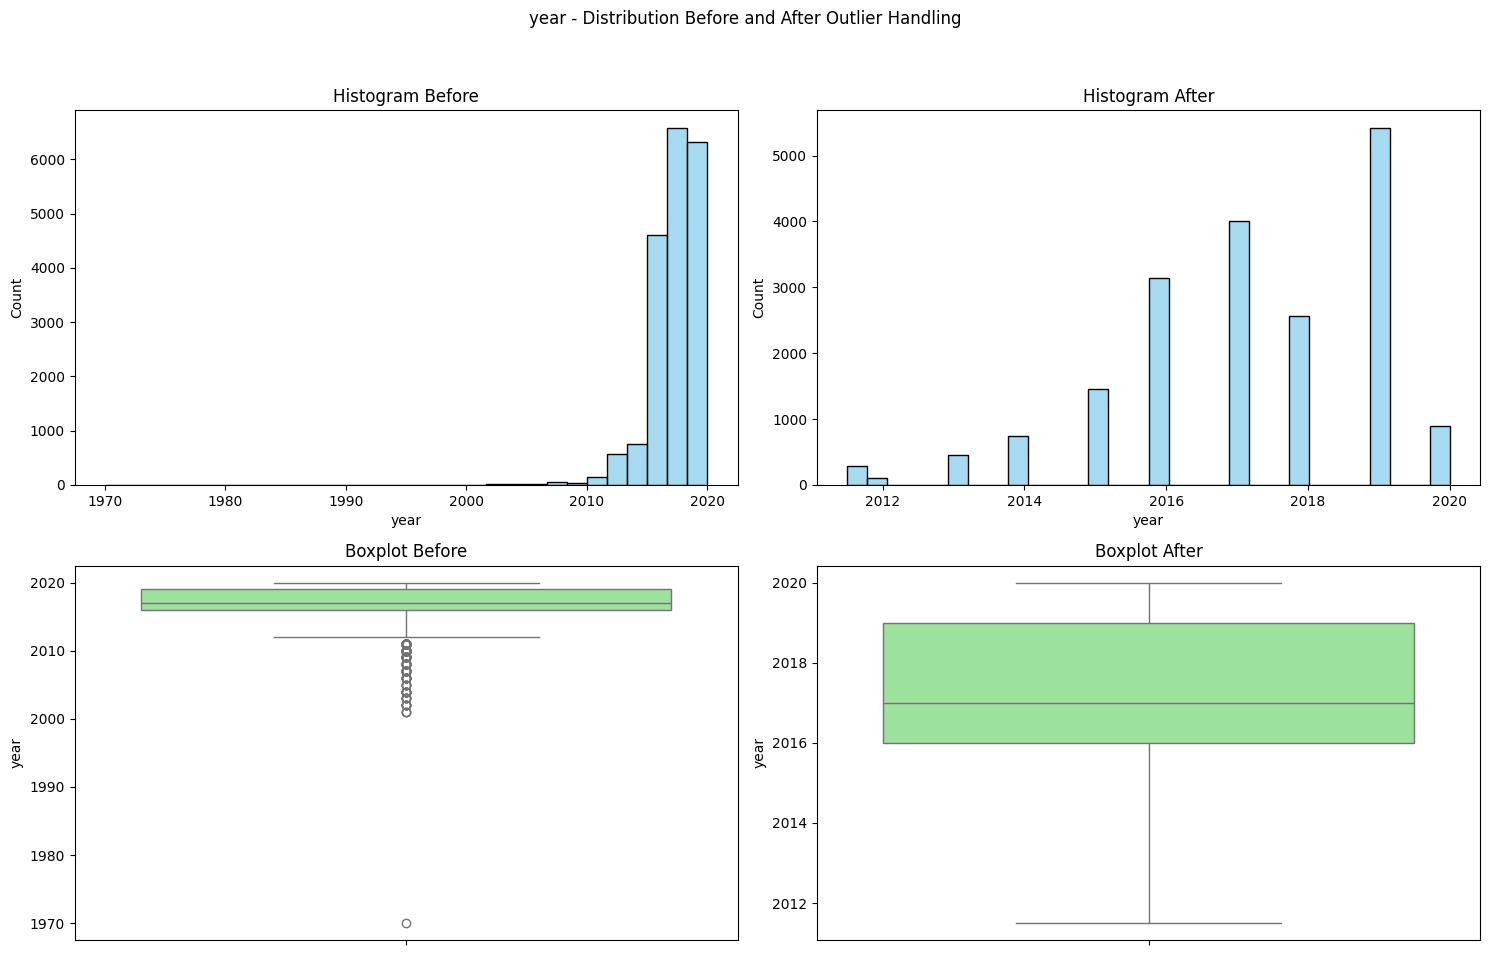

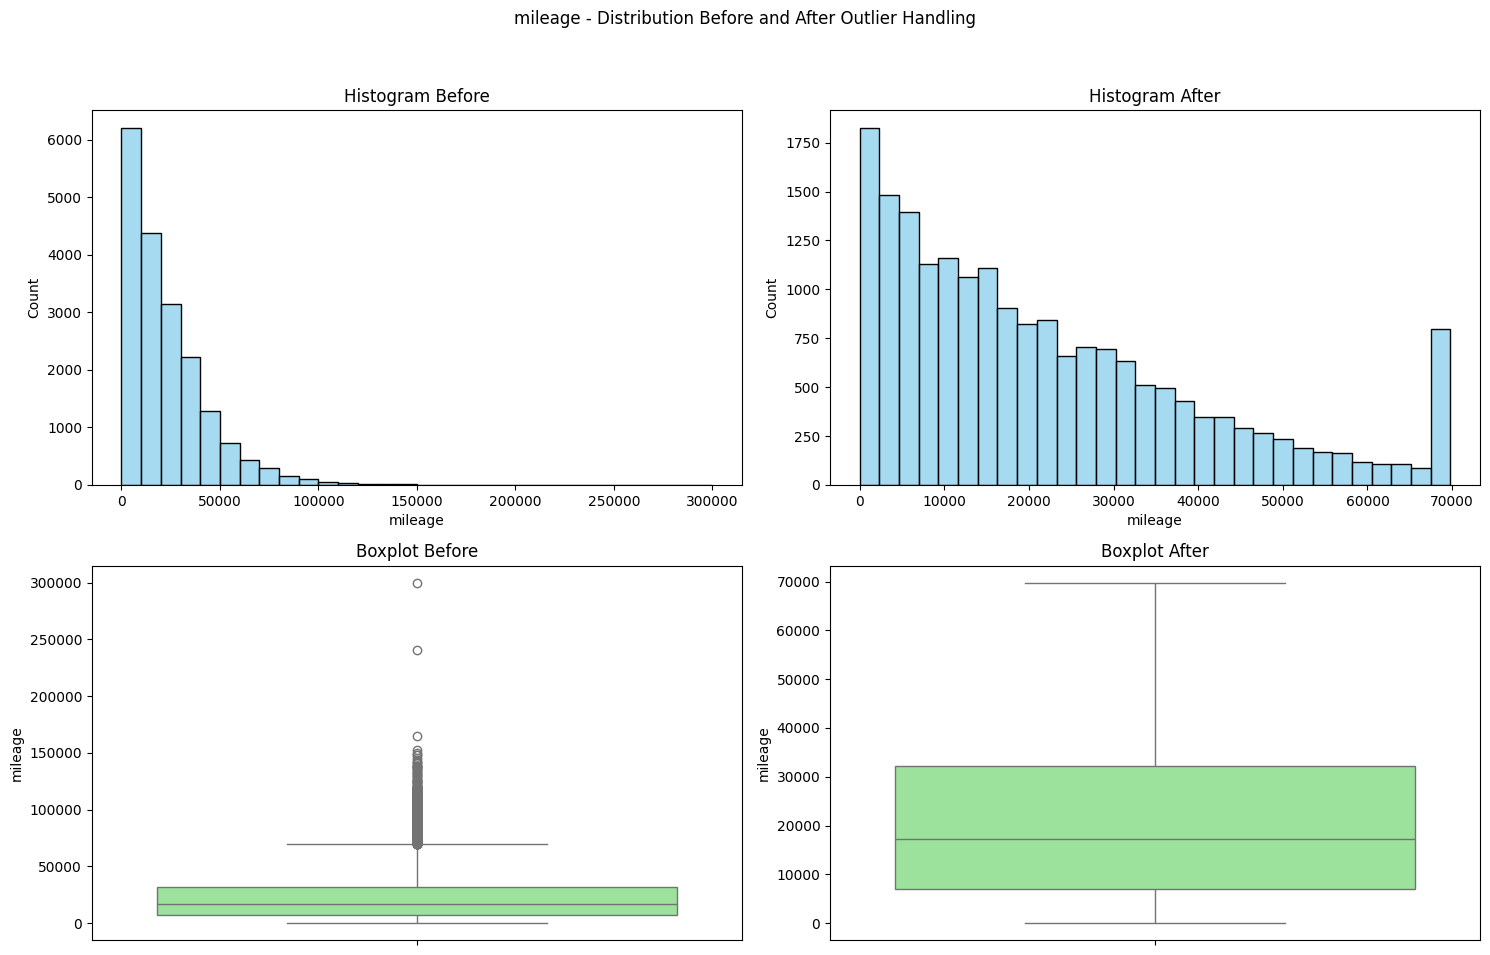

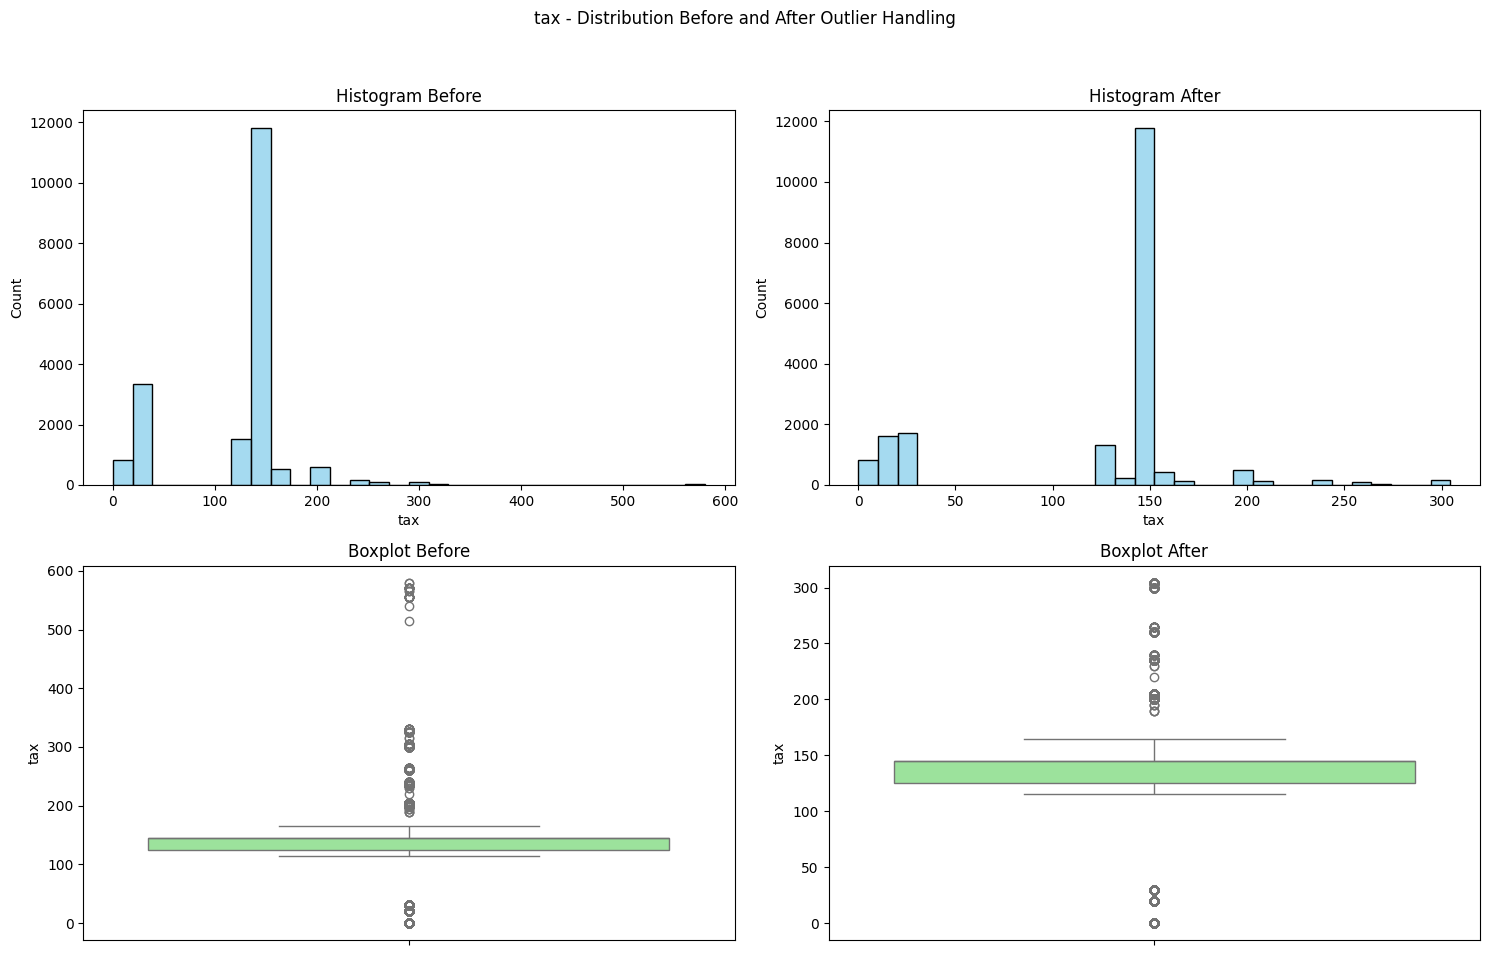

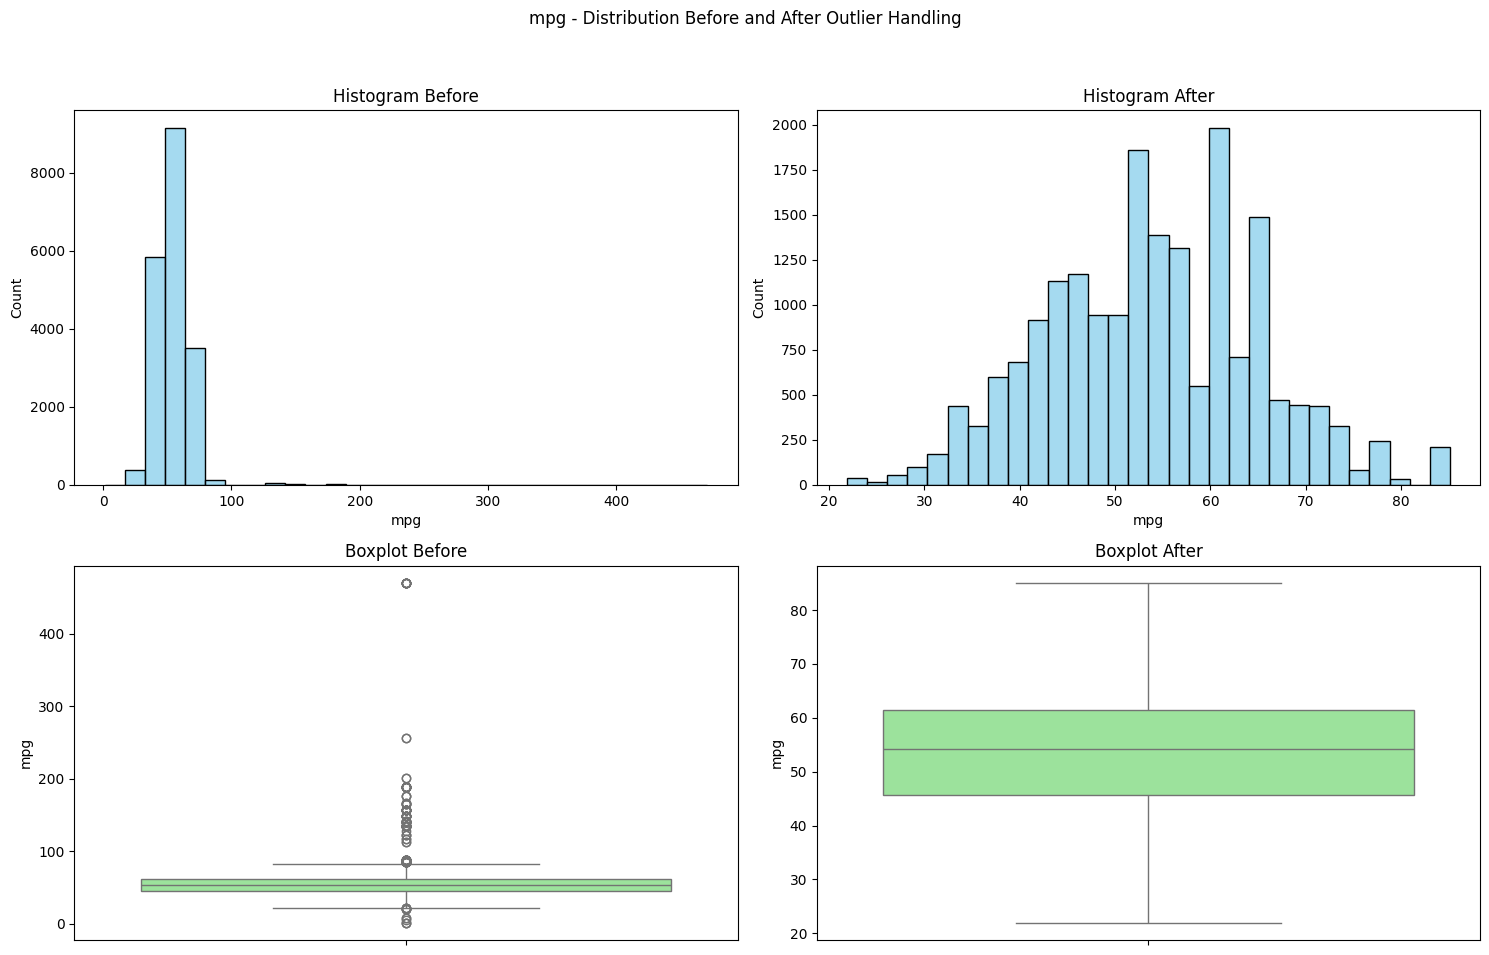

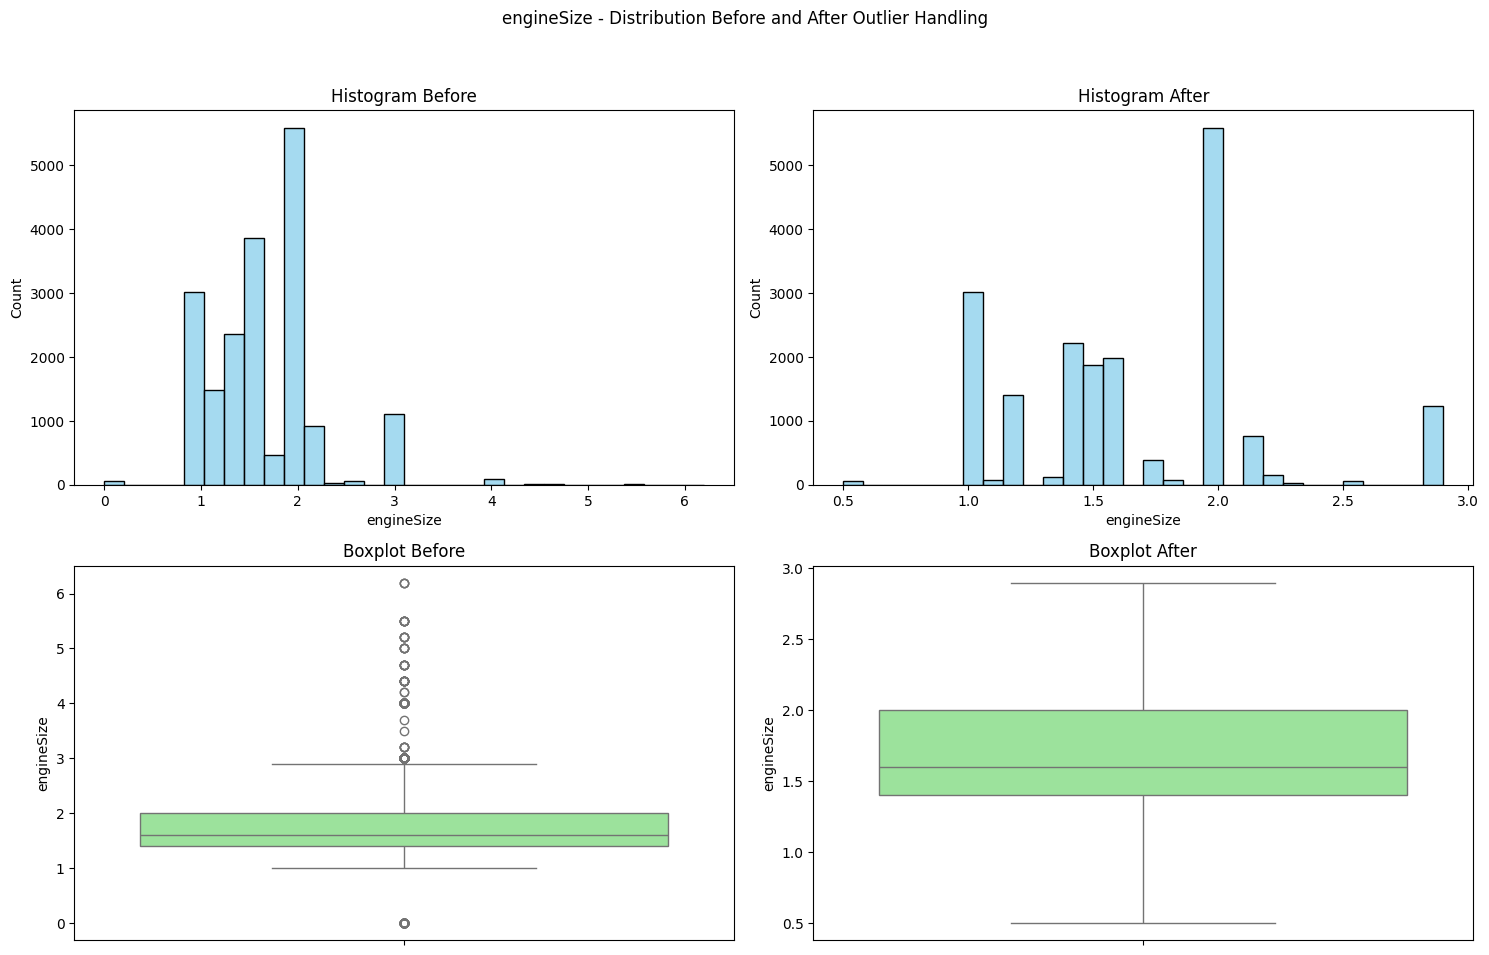

In [35]:
# Using the Function

for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

## Split Data Numerikal dan Kategorikal

In [36]:
# column numeric list
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
# column categorical list
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

print('Numerical List: ', num_columns)
print('Catgorical List: ', cat_columns)

Numerical List:  ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Catgorical List:  ['brand', 'model', 'transmission', 'fuelType']


In [37]:
# override X_train with spliting list
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]
# override X_test with spliting list
X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [38]:
# Checking sizes
print_data_sizes(X_train, y_train, X_test, y_test)

Train Data
Ukuran X_train :  (19085, 9)
Ukuran y_train :  (19085,)


Test Data
Ukuran X_test :  (4772, 9)
Ukuran y_test :  (4772,)


## Feature Selection


### Categories Feature

In [39]:
# Finding the correlation between categorical columns and 'price' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

cat_corr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

cat_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,brand,-0.207130,0.000000e+00,Significant Correlation
1,model,0.020222,3.362442e-05,Significant Correlation
2,transmission,0.104564,7.838621e-77,Significant Correlation
3,fuelType,-0.212686,3.900283e-288,Significant Correlation


In [40]:
# filter corelation categorical
cat_corr[cat_corr['Interpretation'] == "Significant Correlation"]

,Column Name,Correlation Coefficient,P-value,Interpretation
0,brand,-0.207130,0.000000e+00,Significant Correlation
1,model,0.020222,3.362442e-05,Significant Correlation
2,transmission,0.104564,7.838621e-77,Significant Correlation
3,fuelType,-0.212686,3.900283e-288,Significant Correlation


Untuk kolom model karena memiliki high cardinality sehingga memengaruhi model ml, jadi saya drop.
feature yang di pakai adalah 'brand', 'transmission','fuelType'

### Numerical Feature

In [41]:
# Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

num_corr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

num_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,year,0.596967,0.0,Significant Correlation
1,mileage,-0.519718,0.0,Significant Correlation
2,tax,0.322256,0.0,Significant Correlation
3,mpg,-0.449343,0.0,Significant Correlation
4,engineSize,0.588298,0.0,Significant Correlation


In [42]:
# filter corelation numerical
num_corr[num_corr['Interpretation'] == "Significant Correlation"]


,Column Name,Correlation Coefficient,P-value,Interpretation
0,year,0.596967,0.0,Significant Correlation
1,mileage,-0.519718,0.0,Significant Correlation
2,tax,0.322256,0.0,Significant Correlation
3,mpg,-0.449343,0.0,Significant Correlation
4,engineSize,0.588298,0.0,Significant Correlation


<Axes: >

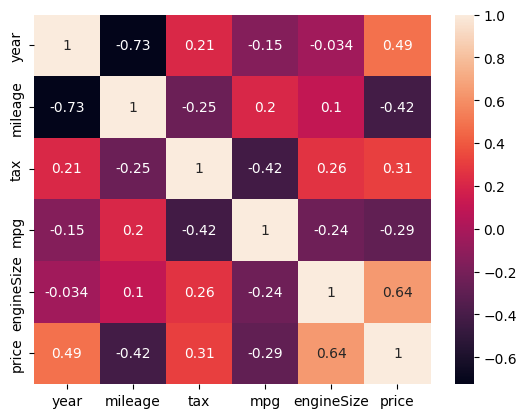

In [43]:
#Creating a heatmap for a better visualization
sns.heatmap(df[['year', 'mileage', 'tax', 'mpg', 'engineSize','price']].corr(),annot=True)

Dari korelasi numerical adalah : 'year', 'mileage', 'tax', 'mpg', 'engineSize'

#### Membuat variable baru Untuk Feature yang berkolerasi

In [44]:
# Membuat list Feature berkorelasi dari numerikal dan kategorikal
selected_col_cat = ['brand','transmission','fuelType']
selected_col_num = ['year','mileage','tax', 'mpg','engineSize']

In [45]:
# append ke x_train dan 
X_train_cat = X_train_cat[selected_col_cat]
X_train_num = X_train_num[selected_col_num]

X_test_cat = X_test_cat[selected_col_cat]
X_test_num = X_test_num[selected_col_num]

In [46]:
# Checking the categorical data
X_train_cat

,brand,transmission,fuelType
9431,Skoda,Semi-Auto,Petrol
17575,Vauxhall,Manual,Petrol
21932,Hyundai,Manual,Diesel
5730,Ford,Manual,Diesel
9608,Ford,Manual,Petrol
...,...,...,...
21696,BMW,Manual,Diesel
5408,Audi,Semi-Auto,Diesel
861,Vauxhall,Manual,Diesel
15874,VW,Manual,Petrol


In [47]:
# Checking the numerical data
X_train_num

,year,mileage,tax,mpg,engineSize
9431,2019.0,13,145.0,38.2,2.0
17575,2016.0,50254,145.0,47.1,0.5
21932,2016.0,53878,20.0,72.4,1.6
5730,2019.0,151,145.0,38.2,2.0
9608,2014.0,23777,0.0,65.7,1.0
...,...,...,...,...,...
21696,2017.0,25818,125.0,60.1,2.0
5408,2013.0,69802,125.0,58.9,2.0
861,2018.0,37211,145.0,53.3,2.0
15874,2019.0,8758,145.0,49.6,1.0


### Scaling dan Encoding

#### Scaling

In [48]:
# Scaling menggunakan Standar Scaler karena lebih cocok untuk model linear regression 

#Initialize the Standar Scaler
scaler = StandardScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## only fit in train
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.96797658, -1.19458741,  0.39383091, -1.39629001,  0.66539605],
       [-0.6465867 ,  1.53200743,  0.39383091, -0.60519333, -2.34206004],
       [-0.6465867 ,  1.72868305, -1.74805985,  1.64365454, -0.13659224],
       ...,
       [ 0.42978882,  0.82415973,  0.39383091, -0.05409227,  0.66539605],
       [ 0.96797658, -0.71999351,  0.39383091, -0.38297516, -1.33957468],
       [-0.10839894,  0.97551963,  1.33626284, -1.10296202,  0.66539605]])

#### Encoding 

In [49]:
# dump data agar tidak ngulang
dummp1 = X_train_cat.copy()
dummp2 = X_test_cat.copy()

In [50]:
# Menggunakan One Hot Encoder karena fitur kategorikal kami tampaknya tidak memiliki hierarki yang ditentukan

#Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)


#Fit_transform for X_train, transform for X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


#Fit_transform for X_train, transform for X_test

X_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

### Concatenate Categorical and Numerical

In [51]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded],axis=1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [52]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.967977,-1.194587,0.393831,-1.396290,0.665396,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.646587,1.532007,0.393831,-0.605193,-2.342060,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.646587,1.728683,-1.748060,1.643655,-0.136592,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.967977,-1.187098,0.393831,-1.396290,0.665396,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.722962,0.095092,-2.090762,1.048110,-1.339575,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,-0.108399,0.205858,0.051128,0.550341,0.665396,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19081,-2.261150,2.592884,0.051128,0.443676,0.665396,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19082,0.429789,0.824160,0.393831,-0.054092,0.665396,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19083,0.967977,-0.719994,0.393831,-0.382975,-1.339575,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.108399,0.602845,-1.748060,1.643655,0.665396,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.429789,-0.152652,0.393831,0.132571,0.665396,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.967977,-0.899357,0.393831,0.550341,-0.337089,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.967977,-1.171251,0.393831,-0.382975,-1.339575,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.646587,-0.640542,-1.748060,0.914779,-1.339575,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,-0.646587,-0.723141,0.393831,-0.382975,-0.537586,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4768,0.429789,0.445407,0.393831,-0.462974,-1.339575,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4769,0.429789,-0.931105,0.393831,0.914779,-1.139078,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4770,-1.184774,-0.390518,-1.748060,0.434788,-1.339575,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


---

# vi. Model Definition

In [54]:
# inisialisasi model
model_linreg = LinearRegression()

---

# vii. Model Training

In [55]:
# fitting model train
model_linreg.fit(X_train_final, y_train)

LinearRegression()

#### coefficients/slope dan intercept

In [56]:
# Check coefficients and intercept

coefficients = model_linreg.coef_
intercept = model_linreg.intercept_

params = {
    'feature': X_train_final.columns.tolist(),
    'coefficient': model_linreg.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  6.562541579244427e+16


,feature,coefficient
0,0,3.209578e+03
1,1,-1.815046e+03
2,2,-1.100017e+03
3,3,-2.802442e+03
4,4,4.134241e+03
5,5,-2.239593e+16
6,6,-2.239593e+16
7,7,-2.239593e+16
8,8,-2.239593e+16
9,9,-2.239593e+16


---

# viii. Model Evaluation

In [57]:
# model evaluasi Train set
y_pred_train = model_linreg.predict(X_train_final)

# model evaluasi Test set
y_pred_test = model_linreg.predict(X_test_final)

In [58]:
y_pred_train

array([28264., -1320.,  5512., ..., 15232., 15328., 18152.])

In [59]:
y_pred_test

array([20848., 21288., 14256., ..., 11272.,  6976.,  6280.])

In [60]:
y_pred_test.shape

(4772,)

In [61]:
y_pred_train.shape

(19085,)

In [62]:
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print('')

MAE - Train Set  :  2934.4943673041657
MAE - Test Set   :  863629395083.6787

MSE - Train Set  :  22812712.900864553
MSE - Test Set   :  3.559223529404976e+27

RMSE - Train Set :  4776.265581064829
RMSE - Test Set  :  59659228367495.47

R2 Score - Train Set :  0.770306920956579
R2 Score - Test Set  :  -3.7870676068300505e+19



Menggunakan RMSE sebagai model evaluasi untuk mengurangi eror sekecil mungkin, dari evaluasi disimpulkan model tidak baik.

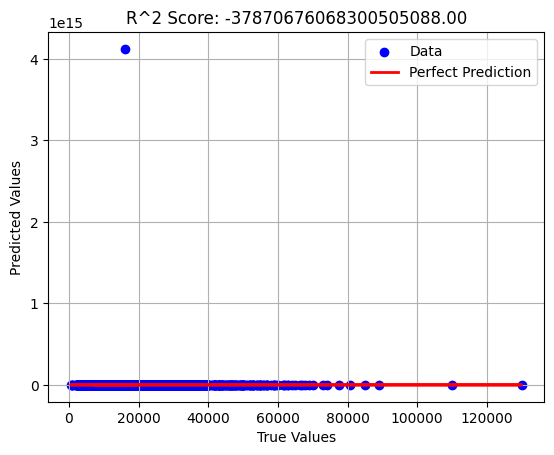

In [63]:
# Plot evaluasi model dengan R2 Score
r2 = r2_score(y_test, y_pred_test)

# plot data
plt.figure()
plt.scatter(y_test, y_pred_test, c='blue', label='Data')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R^2 Score: {r2:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Evaluasi model dengan asumsi Multivariate Normality

# get residual
y_test_residuals = y_test - y_pred_test
y_test_residuals

2869    -1649.0
23723   -3293.0
15801    2129.0
22249   -3897.0
21941   -1063.0
          ...  
17284    5234.0
3990    -2161.0
22801   -1375.0
16029    -276.0
3435     1220.0
Name: price, Length: 4772, dtype: float64

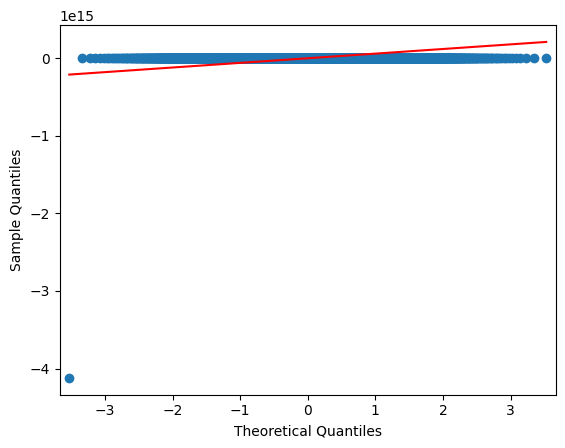

In [65]:
# Plot QQ plot residual

sm.qqplot(y_test_residuals, line ='s')
plt.show()

### Analysis model

In [94]:
print('Jumlah nilai minimum - Prediksi:',y_pred_train.min())
print('Jumlah nilai maximum - Prediksi:',y_pred_train.max())

Jumlah nilai minimum - Prediksi: -6928.0
Jumlah nilai maximum - Prediksi: 45912.0


In [96]:
print('Jumlah nilai minimum:',y_train.min())
print('Jumlah nilai maximum:',y_train.max())

Jumlah nilai minimum: 675
Jumlah nilai maximum: 140319


In [92]:
print('Jumlah nilai minimum - Prediksi:',y_pred_test.min())
print('Jumlah nilai maximum - Prediksi:',y_pred_test.max())

Jumlah nilai minimum: -7696.0
Jumlah nilai maximum: 4121239459489368.0


In [93]:
print('Jumlah nilai minimum:',y_test.min())
print('Jumlah nilai maximum:',y_test.max())

Jumlah nilai minimum: 495
Jumlah nilai maximum: 129990


Dari hasil min dan max harga memiliki kecenderungan rendah yang menghasilkan prediksi lebih  rendah

---

# ix. Model Saving

In [66]:
#Model saving

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(selected_col_num, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(selected_col_cat, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model.pkl', 'wb') as file_5:
  pickle.dump(model_linreg, file_5)

---

# x. Model Inference

In [67]:

# Load model and other files

with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

with open("model.pkl", "rb") as file_3:
  model = pickle.load(file_3)

with open("scaler.pkl", "rb") as file_4:
  scaler = pickle.load(file_4)

with open("encoder.pkl", "rb") as file_5:
  encoder = pickle.load(file_5)

In [72]:
df.tail()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,17490,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,3998,Manual,58350,Petrol,125,51.4,1.2
23999,Audi,Q5,2019,31995,Semi-Auto,12413,Diesel,150,38.2,2.0


In [77]:

# Making a randomized dataset for inference
data_inf = [
    {
        'brand': 'Hyundai',
        'model':'Tucson',
        'year':2019,
        'transmission':'Manual', 
        'mileage':58350,
        'fuelType':'Petrol', 
        'tax':145, 
        'mpg':34.3, 
        'engineSize':1.6,
    }
]

# Convert to DataFrame
data_inf = pd.DataFrame(data_inf)

# Display the DataFrame
data_inf

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Hyundai,Tucson,2019,Manual,58350,Petrol,145,34.3,1.6


#### Splitting Dataset Into Categorical and Numerical Columns

In [78]:
#Splitting the dataset into categorical and numerical columns

data_infNum = data_inf[list_num_col]
data_infCat = data_inf[list_cat_col]

#### Scaling and Encoding

In [79]:
# Scaling the numerical features, encoding the categorical features, and concatenating them back again

data_inf_scaled_num = scaler.transform(data_infNum)
data_inf_cat_encoded = encoder.transform(data_infCat)
data_inference_final = np.concatenate([data_inf_scaled_num, data_inf_cat_encoded], axis = 1)

#### Predicting

In [80]:
#Predicting

y_pred_inference = model.predict(data_inference_final)
y_pred_inference

array([16472.])

---

# xi. Kesimpulan

### Conclusions

Model analysis
Dari model yang saya buat bisa dapat disimpulakan tidak bagus, bisa di lihat dari model evaluation dalam hal selisih residual yang tinggi serta r2 score yang ada data noise. Karena waktu terbatas jadi saya sarankan untuk improve model dengan cara sebagai berikut :
- feature enginering (handiling outlier,scaling ,encoding ,dll)
- memilih algoruthm model lain
- paremeter yang cocok

Dari hasil min dan max harga memiliki kecenderungan rendah yang menghasilkan prediksi lebih  rendah

Analysis EDA
Dari hasil plot data distribusi bahan bakar yang efisien lebih banyak, artinya untuk mobil idaman bisa dibilang terpenuhi.

bisnis sugestion
Promosikan spek mobil dengan kategori super efecient


